# PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
## Centrar los datos
iris_centrad=(iris.data - iris.data.mean(axis=0))

In [5]:
iris_centrad[:10]

array([[-0.74333333,  0.44266667, -2.358     , -0.99933333],
       [-0.94333333, -0.05733333, -2.358     , -0.99933333],
       [-1.14333333,  0.14266667, -2.458     , -0.99933333],
       [-1.24333333,  0.04266667, -2.258     , -0.99933333],
       [-0.84333333,  0.54266667, -2.358     , -0.99933333],
       [-0.44333333,  0.84266667, -2.058     , -0.79933333],
       [-1.24333333,  0.34266667, -2.358     , -0.89933333],
       [-0.84333333,  0.34266667, -2.258     , -0.99933333],
       [-1.44333333, -0.15733333, -2.358     , -0.99933333],
       [-0.94333333,  0.04266667, -2.258     , -1.09933333]])

In [7]:
np.cov(m=iris_centrad.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [8]:
Matriz_Covarianza=np.cov(m=iris_centrad.T)

In [10]:
valores_propios, vectrores_propios=np.linalg.eig(Matriz_Covarianza)

In [11]:
valores_propios

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

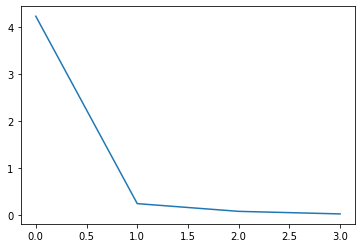

In [12]:
plt.plot(valores_propios)

In [13]:
valores_propios/sum(valores_propios)

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [14]:
#### Utilizamos Sklearn

In [15]:
from sklearn.decomposition import PCA

In [16]:
CP=PCA(n_components=2)

In [17]:
iris_pca=CP.fit_transform(iris_centrad)

In [18]:
iris_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [19]:
CP.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [20]:
CP.explained_variance_

array([4.22824171, 0.24267075])

In [21]:
CP.explained_variance_ratio_

array([0.92461872, 0.05306648])

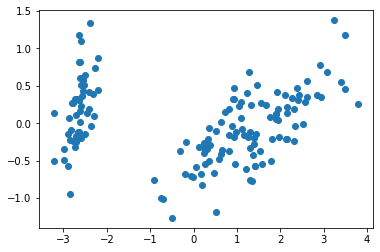

In [22]:
plt.scatter(iris_pca[:,0],iris_pca[:,1])

In [23]:
datos=pd.DataFrame(iris_pca,columns=["CP1","CP2"])
datos["Target"]=iris.target

In [24]:
datos.head()

,CP1,CP2,Target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


### Modelo supervisado
aplicamos un modelo supervisado 

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [27]:
cancer=load_breast_cancer()

In [28]:
escalado=StandardScaler()

In [29]:
escalado.fit(cancer.data)
cancer_escalado=escalado.transform(cancer.data)

In [31]:
pca=PCA(n_components=2)

In [32]:
pca.fit(cancer_escalado)

PCA(n_components=2)

In [33]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [34]:
cancer_pca=pca.transform(cancer_escalado)

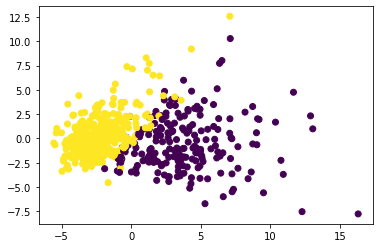

In [38]:
plt.scatter(cancer_pca[:,0],cancer_pca[:,1],c=cancer.target)

In [39]:
pca=PCA(n_components=30)

In [40]:
pca.fit(cancer_escalado)

PCA(n_components=30)

In [42]:
(pca.explained_variance_ratio_).cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [43]:
pca_7=PCA(n_components=7)

In [44]:
pca_7.fit_transform(cancer_escalado)

array([[ 9.19283683,  1.94858307, -1.12316607, ..., -1.1951093 ,
         1.41142459,  2.15934985],
       [ 2.3878018 , -3.76817174, -0.52929272, ...,  0.62177465,
         0.02865618,  0.01337682],
       [ 5.73389628, -1.0751738 , -0.55174751, ..., -0.17708516,
         0.54145178, -0.66816125],
       ...,
       [ 1.25617928, -1.90229671,  0.56273051, ...,  1.80999122,
        -0.53444722, -0.19275704],
       [10.37479406,  1.67201011, -1.87702934, ..., -0.03374197,
         0.5679368 ,  0.22305733],
       [-5.4752433 , -0.67063679,  1.49044313, ..., -0.18470287,
         1.61783735,  1.69894471]])

In [45]:
pca_7.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-